# Lesson 4 pdf fashion mnist example. Page 107 - 117

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [3]:
traindata = torchvision.datasets.FashionMNIST(root='./data',
                                            train=True,
                                            download=True,
                                            transform=transform)

trainloader = torch.utils.data.DataLoader(traindata, batch_size=4, shuffle=True)

In [4]:
testdata = torchvision.datasets.FashionMNIST(root='./data',
                                            train=False,
                                            download=True,
                                            transform=transform)

testloader = torch.utils.data.DataLoader(testdata, batch_size=4, shuffle=False)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(image):
    image = image / 2 + 0.5   # unnormalize
    np_img = image.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

Shirt    Bag  Sandal  Trouser


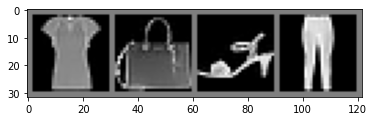

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()


show_image(torchvision.utils.make_grid(images))

#Added the classes line as it is not previously defined. Figured out from other mnist code on github

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print('  '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

In [8]:
from torch import optim

model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
for epoch in range(5):
    running_loss = 0.0
    for inputs, labels in trainloader:
        output = model(inputs)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print (f"loss: {running_loss/len(trainloader)}")
        
print ('Finished Training')

loss: 2.3610655944426853
loss: 2.3611501692612964
loss: 2.361150169269244
loss: 2.3611501692533494
loss: 2.3611501692612964
Finished Training


In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print ('Accuracy of the network on the 10000 test images: %d%%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 10%
